# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aspng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1965

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'14 LE SOIR MERCREDI 6 JANVIER 1965 - NOS MOTS-CROISÉS Solution du problème n° 5812 sociétés BOURSES ETRANGERES Belge 5 1/2 % 57-62 $ ; 101 1/2 - 102 1/2 ; Belge 5 1/2 fi 61-76 5 : 101 3/4- 102 3/4 ; B'

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'14 LE SOIR MERCREDI 6 JANVIER 1965 - NOS MOTS-CROISÉS Solution du problème n° 5812 sociétés BOURSES ETRANGERES Belge 5 1/2 % 57-62 $ ; 101 1/2 - 102 1/2 ; Belge 5 1/2 fi 61-76 5 : 101 3/4- 102 3/4 ; Belge 5 1/4 % 62-77 S ; 100 1/2- 101 1/2 ; Fonds Routes 5 3/4 % 60-75 $/DM : 105 1/2 - 106 1/2 : Idem DM/5 : 102 1/4 - 103 1/4 ; Sabena 3/4 % 59-74 DM/S : 102 1/4 - 103 1/;» ; R. T. T. 5 1/2 % 58-73 Ire et 2e série S : 102 A. ; S. N. C. B. 61-76 5 1/4 % $/DM : 99 7/8- 100 7/S ; O. N. P. T. I. 5 1/2 n'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1965_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOIR MERCREDI JANVIER MOTS CROISÉS SOLUTION PROBLÈME SOCIÉTÉS BOURSES ETRANGERES BELGE BELGE BELGE FONDS ROUTES IDEM SABENA IRE SÉRIE OBI PETROFINA CONGO CONGO FSS CONGO FSS CONGO FSS CONGO FSS BROCKVILLE CHEMICALS PORT BROCKVILLE CHEMICALS UNITÉ CANADIAN INV FUND PORTEUR ISO CANAFUND VOTING TRUST CERT PART FRENCH PETRO PORTEUR LAFARGE CERNENT IDEM ACT ORD PORTEUR SHELL PORT ORIG WESTBURNE OIL POR TEUR BANQUE EUROPÉENNE INVEST IDEM IDEM COURS COMMUNIQUÉS ÉTRANGER FONC FRANCE BANCO FÔMENTO CASSA '

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 1317), ('BRUXELLES', 1162), ('TÉL', 1111), ('ANS', 672), ('PRIX', 509), ('TRÈS', 464), ('BRUX', 460), ('PART', 420), ('HEURES', 405), ('SAINT', 391)]


### Créer, stocker et afficher le nuage de mots

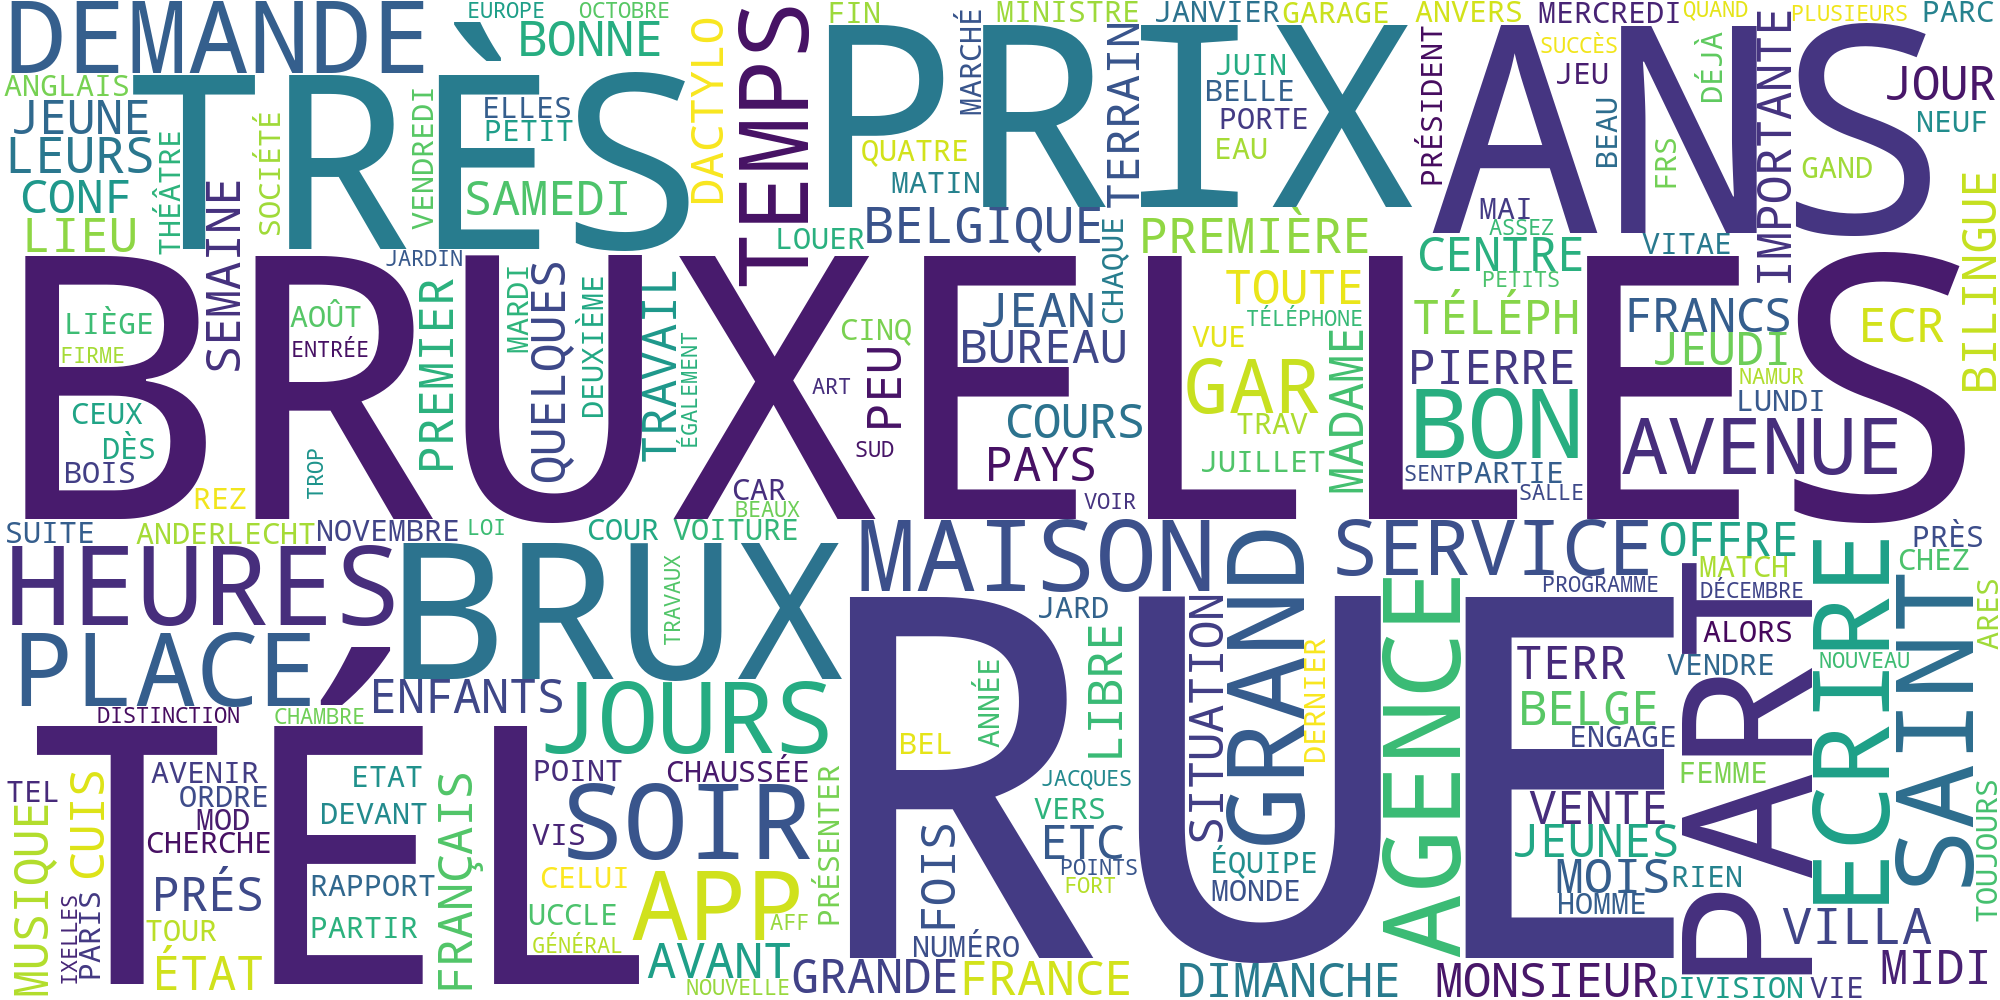

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))